In [78]:
#import library
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
com_name=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [33]:
data = pd.read_csv("heartdisease_data.csv",names=com_name)

In [34]:
#check first 5 rows
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [35]:
data.isin(['?']).sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [42]:
#all data ? replace to Nan 
data = data.replace('?', np.NaN)

In [43]:
#fill null values
for col in ['trestbps', 'chol', 'fbs','thalach','exang','oldpeak','slope','ca','thal']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [44]:
#check null values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [46]:
#check first 5 rows 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0


In [47]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [48]:
data.nunique(axis=0)

age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
num          5
dtype: int64

In [49]:
data.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [50]:
corr = data.corr()

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

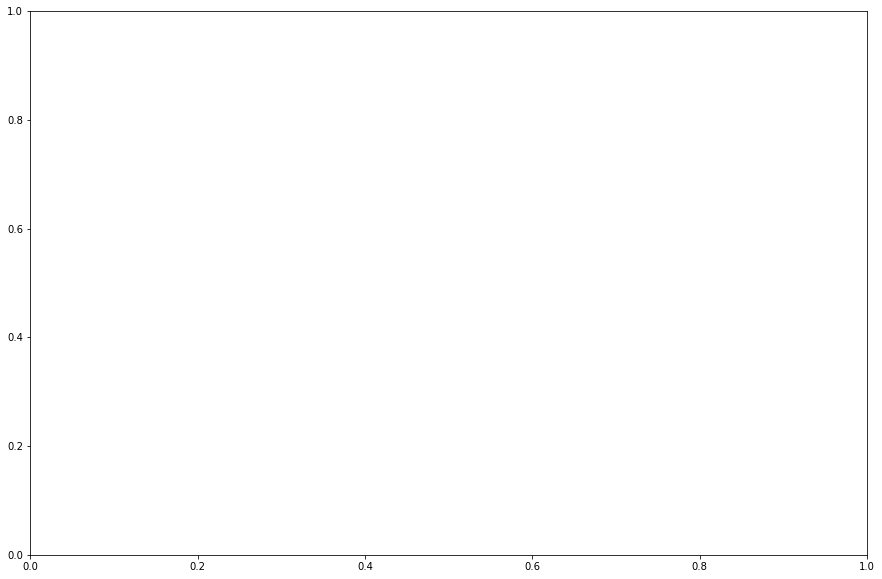

In [51]:
plt.subplots(figsize=(15,10))

<AxesSubplot:>

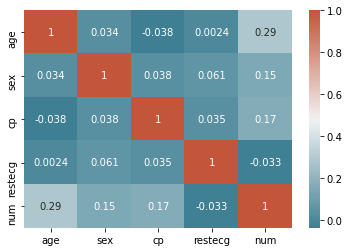

In [52]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

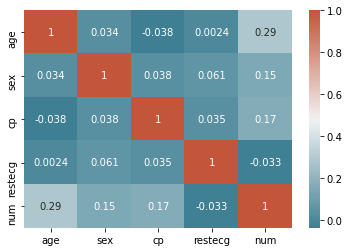

In [53]:
sns.heatmap(corr, xticklabels=corr.columns,

           yticklabels=corr.columns,

           annot=True,

           cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [54]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]

<Figure size 1440x1440 with 0 Axes>

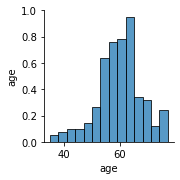

In [59]:
plt.figure(figsize=(20,20))
sns.pairplot(subData)

# Using Violin and Box Plots

Text(0, 0.5, 'Thalach Level')

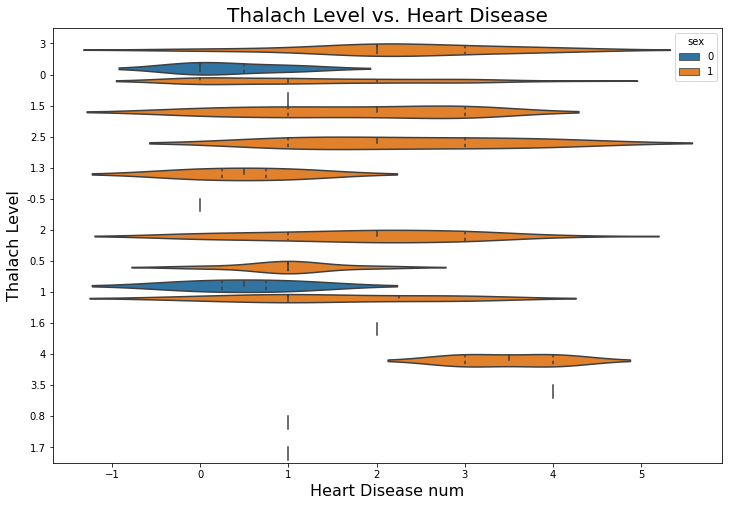

In [63]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'num', y='oldpeak',hue='sex', inner='quartile',data= data )

plt.title("Thalach Level vs. Heart Disease",fontsize=20)

plt.xlabel("Heart Disease num", fontsize=16)

plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

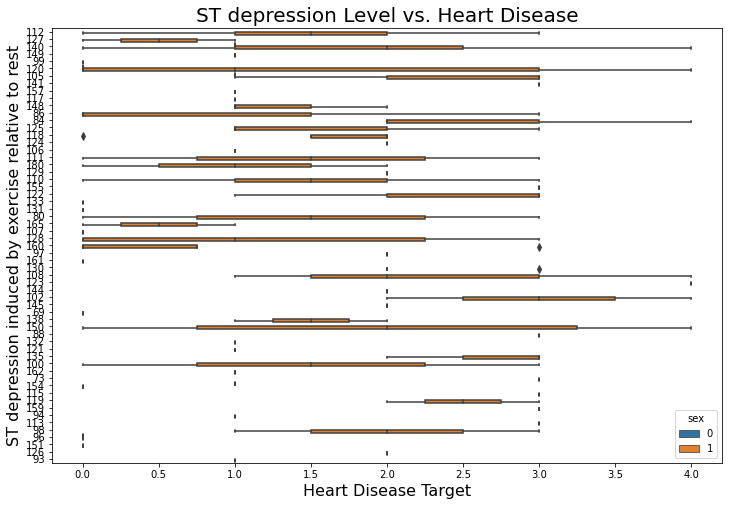

In [65]:
plt.figure(figsize=(12,8))

sns.boxplot(x= 'num', y= 'thalach',hue="sex", data=data )

plt.title("ST depression Level vs. Heart Disease", fontsize=20)

plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

# Filtering Data1a

In [66]:
pos_data = data[data['num']==1]
pos_data.describe()


,age,sex,cp,restecg,num
count,56.000000,56.000000,56.000000,56.000000,56.0
mean,57.571429,0.946429,3.642857,0.714286,1.0
std,7.203174,0.227208,0.698793,0.755929,0.0
min,38.000000,0.000000,1.000000,0.000000,1.0
25%,54.750000,1.000000,3.750000,0.000000,1.0
50%,57.500000,1.000000,4.000000,1.000000,1.0
75%,62.000000,1.000000,4.000000,1.000000,1.0
max,75.000000,1.000000,4.000000,2.000000,1.0


In [67]:
#Similarly, we’ll filter the data according to negative heart disease patients:
pos_data = data[data['num']==0]
pos_data.describe()

,age,sex,cp,restecg,num
count,51.000000,51.000000,51.000000,51.000000,51.0
mean,56.823529,0.941176,3.156863,0.803922,0.0
std,9.045896,0.237635,0.924609,0.693386,0.0
min,35.000000,0.000000,1.000000,0.000000,0.0
25%,52.000000,1.000000,3.000000,0.000000,0.0
50%,58.000000,1.000000,3.000000,1.000000,0.0
75%,62.500000,1.000000,4.000000,1.000000,0.0
max,75.000000,1.000000,4.000000,2.000000,0.0


# Using Machine Learning Algorithms

In [71]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# spliting data

In [74]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Model

# 1st Model: Logistic Regression

In [84]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression(random_state=1) # get instance of model

model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.29      0.45      0.36        11
           2       0.10      0.25      0.14         4
           3       0.67      0.17      0.27        12
           4       0.00      0.00      0.00         3

    accuracy                           0.30        40
   macro avg       0.29      0.25      0.23        40
weighted avg       0.39      0.30      0.29        40



# Support Vector Machine (SVM)

In [93]:
from sklearn.metrics import classification_report

from sklearn.svm import SVC

model2 = SVC(random_state=1) # get instance of model

model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.28      0.73      0.40        11
           2       0.09      0.25      0.13         4
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3

    accuracy                           0.23        40
   macro avg       0.07      0.20      0.11        40
weighted avg       0.08      0.23      0.12        40



# Random Forest

In [94]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=1)# get instance of model

model3.fit(x_train, y_train) # Train/Fit model

y_pred3 = model3.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.46      0.55      0.50        11
           2       0.20      0.50      0.29         4
           3       0.33      0.17      0.22        12
           4       0.00      0.00      0.00         3

    accuracy                           0.35        40
   macro avg       0.27      0.32      0.28        40
weighted avg       0.34      0.35      0.33        40



# XGBoost

In [95]:
from xgboost import XGBClassifier

model4 = XGBClassifier(random_state=1)

model4.fit(x_train, y_train)

y_pred4= model4.predict(x_test)

print(classification_report(y_test, y_pred4))

[12:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.42      0.45      0.43        11
           2       0.22      0.50      0.31         4
           3       0.50      0.42      0.45        12
           4       0.00      0.00      0.00         3

    accuracy                           0.40        40
   macro avg       0.33      0.35      0.33        40
weighted avg       0.41      0.40      0.40        40



# Finding Feature Score

In [90]:
importance = model6.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):

   print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18524
Feature: 1, Score: 0.00911
Feature: 2, Score: 0.06793
Feature: 3, Score: 0.11775
Feature: 4, Score: 0.17265
Feature: 5, Score: 0.05003
Feature: 6, Score: 0.07272
Feature: 7, Score: 0.12710
Feature: 8, Score: 0.03502
Feature: 9, Score: 0.11324
Feature: 10, Score: 0.03656
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01264


# Saving Best Model

In [98]:
import pickle
#save model Random Forest
file = 'XGBoost'
#save file
save = pickle.dump(model4,open(file,'wb'))